<a href="https://colab.research.google.com/github/Aumatell/Python_deep_learning-Practical_introduction_with_keras_and_tensorflow/blob/main/5_Neural_Netorks_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load environment

In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


5.1 Preload data from keras

In [5]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


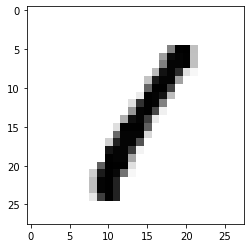

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [9]:
print(y_train[3])

1


In [11]:
print(x_train.ndim)

3


In [12]:
print(x_train.shape)

(60000, 28, 28)


In [13]:
print(x_train.dtype)

uint8


In [16]:
my_slice = x_train[1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [17]:
my_slice = x_train[1:100,0:28,0:28]
print(my_slice.shape)

(99, 28, 28)


In [18]:
my_slice = x_train[:,:14,14:]
print(my_slice.shape)

(60000, 14, 14)


In [20]:
my_slice = x_train[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)


5.2 Proessing of entry data for a neural network

In [21]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [23]:
x_train = x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)

In [24]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
print(y_test[0])

7


In [27]:
print(y_train[0])

5


In [28]:
print(y_train.shape)

(60000,)


In [29]:
print(x_test.shape)

(10000, 784)


In [30]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [31]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
print(y_train.shape)

(60000, 10)


In [33]:
print(y_test.shape)

(10000, 10)


5.3 Model Definition